In [16]:
import os
import pandas as pd

# Set the working directory to your folder
os.chdir('/Users/kidd/Desktop/CUNY/CUNY_SPS/2025_1_Spring/IS-362/IS-362_Week_12/IS362_Assignment')

# Verify the file exists
print("File exists:", os.path.isfile('agaricus-lepiota.data'))

# Now load the data
columns = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
    'ring-type', 'spore-print-color', 'population', 'habitat'
]

df = pd.read_csv('agaricus-lepiota.data', header=None, names=columns)

File exists: True


In [18]:
# Subset the DataFrame
subset = df[['class', 'odor', 'cap-color']].copy()

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
subset['class'] = le.fit_transform(subset['class'])  # e=0, p=1
subset['odor'] = le.fit_transform(subset['odor'])
subset['cap-color'] = le.fit_transform(subset['cap-color'])

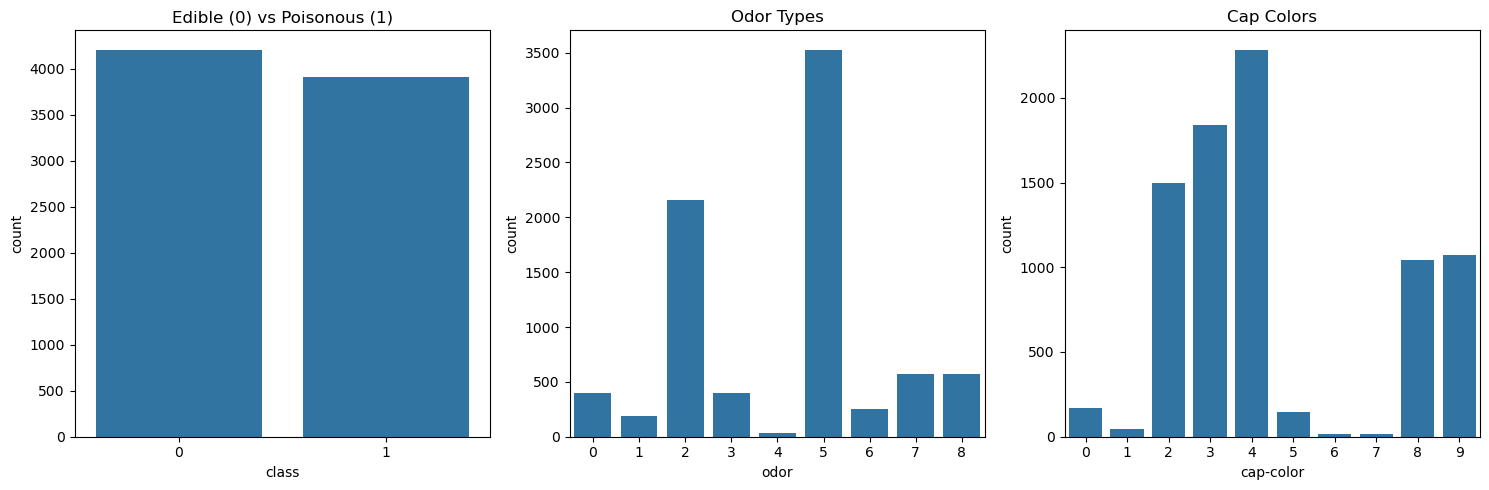

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(data=subset, x='class', ax=axes[0]).set_title('Edible (0) vs Poisonous (1)')
sns.countplot(data=subset, x='odor', ax=axes[1]).set_title('Odor Types')
sns.countplot(data=subset, x='cap-color', ax=axes[2]).set_title('Cap Colors')
plt.tight_layout()
plt.show()

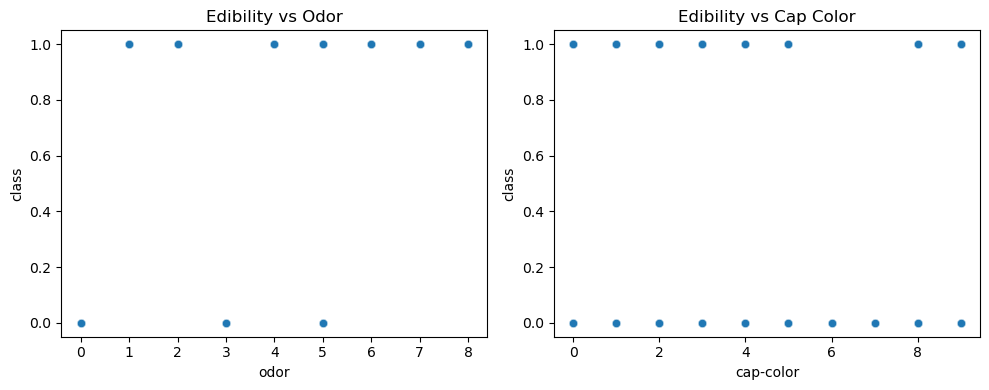

In [24]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(data=subset, x='odor', y='class', alpha=0.5)
plt.title('Edibility vs Odor')

plt.subplot(1, 2, 2)
sns.scatterplot(data=subset, x='cap-color', y='class', alpha=0.5)
plt.title('Edibility vs Cap Color')
plt.tight_layout()
plt.show()

In [26]:
print("Class vs Odor:")
print(pd.crosstab(subset['class'], subset['odor']))

print("\nClass vs Cap Color:")
print(pd.crosstab(subset['class'], subset['cap-color']))

Class vs Odor:
odor     0    1     2    3   4     5    6    7    8
class                                              
0      400    0     0  400   0  3408    0    0    0
1        0  192  2160    0  36   120  256  576  576

Class vs Cap Color:
cap-color    0   1    2     3     4   5   6   7    8    9
class                                                    
0           48  32  624  1032  1264  56  16  16  720  400
1          120  12  876   808  1020  88   0   0  320  672


### Preliminary Conclusions:
- **Odor**:  
  - Mushrooms with certain odors (e.g., `none` or `almond`) are more likely to be edible (`class=0`).  
  - Strong odors (e.g., `foul`) correlate with poisonous mushrooms (`class=1`).  
- **Cap Color**:  
  - White caps (`cap-color=w`) are frequently edible.  
  - Green caps (`cap-color=r`) are rare but often poisonous.  

Both features appear useful for predicting edibility.